In [1]:
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline

In [2]:
f_birth = pd.read_csv('daily-total-female-births.csv',parse_dates = [0],index_col = [0])

In [3]:
f_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
series_value = f_birth.values

In [5]:
f_birth.size

365

In [6]:
f_birth.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [7]:
f_birth.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='Date'>

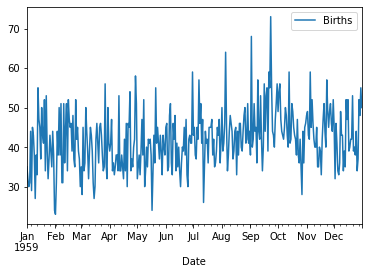

In [8]:
f_birth.plot()

In [9]:
f_birth_mean = f_birth.rolling(window = 20).mean()

<AxesSubplot:xlabel='Date'>

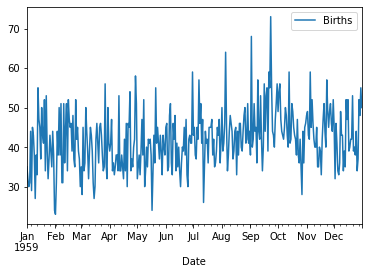

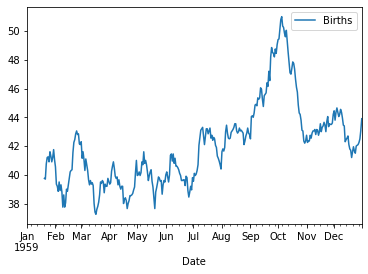

In [10]:
f_birth.plot()
f_birth_mean.plot()

## change series_value to dataframe

In [11]:
value = pd.DataFrame(series_value)

In [12]:
birth_df = pd.concat([value,value.shift(1)],axis=1)

In [13]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [14]:
birth_df.columns = ['Actual_birth','Forecast_birth']

In [15]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


# compare mse with sd

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
birth_test = birth_df[1:]
birth_test.tail()

,Actual_birth,Forecast_birth
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [18]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)

In [19]:
np.sqrt(birth_error)

9.177283229394606

# ARIMA model (p,d,q)

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

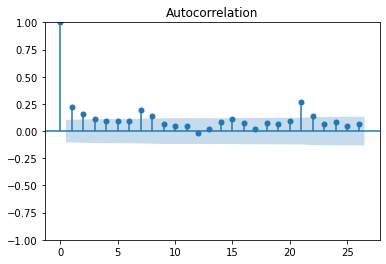

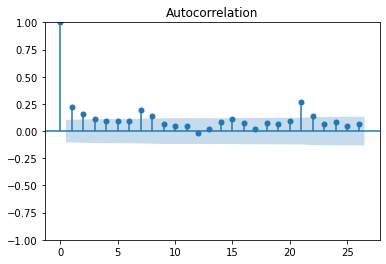

In [21]:
#plot_acf is to identify Q
#d=0, if original graph is already stationary
plot_acf(f_birth)

/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


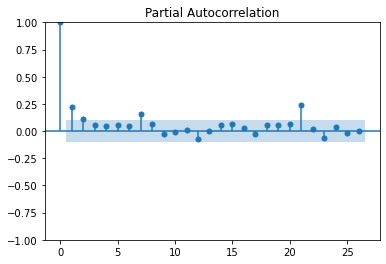

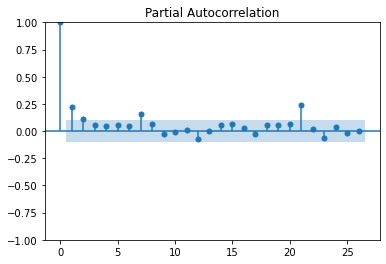

In [22]:
plot_pacf(f_birth)

In [23]:
birth_train = f_birth[:330]
birth_test = f_birth[330:]

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
birth_model = ARIMA(birth_train,order=(2,0,3))

/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [26]:
birth_model_fit = birth_model.fit() # fit the model

/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [27]:
#smaller = better for aic
birth_model_fit.aic

2256.9899897675714

In [28]:
birth_forecast = birth_model_fit.forecast(steps = 35)

In [29]:
birth_forecast

1959-11-27    42.831477
1959-11-28    41.959433
1959-11-29    41.768058
1959-11-30    41.954189
1959-12-01    41.773158
1959-12-02    41.949229
1959-12-03    41.777982
1959-12-04    41.944537
1959-12-05    41.782546
1959-12-06    41.940098
1959-12-07    41.786863
1959-12-08    41.935899
1959-12-09    41.790946
1959-12-10    41.931928
1959-12-11    41.794809
1959-12-12    41.928171
1959-12-13    41.798463
1959-12-14    41.924617
1959-12-15    41.801920
1959-12-16    41.921255
1959-12-17    41.805190
1959-12-18    41.918075
1959-12-19    41.808283
1959-12-20    41.915066
1959-12-21    41.811209
1959-12-22    41.912221
1959-12-23    41.813976
1959-12-24    41.909529
1959-12-25    41.816595
1959-12-26    41.906982
1959-12-27    41.819071
1959-12-28    41.904574
1959-12-29    41.821414
1959-12-30    41.902295
1959-12-31    41.823630
Freq: D, Name: predicted_mean, dtype: float64

# now check predicted value with test value

In [30]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.594508066437434

In [31]:
f_birth.std()

Births    7.348257
dtype: float64

# normalisation 
# if your data is on different scales
# because some algorithms work better when data is normalised

# normalization = (x-min)/(max-min)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
birth_arr = f_birth.values

In [34]:
birth_arr

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))

In [36]:
scaler = scaler.fit(birth_arr)

In [37]:
scaler.data_min_

array([23.])

In [38]:
scaler.data_max_

array([73.])

In [39]:
birth_normalise = scaler.transform(birth_arr)

In [40]:
for i in range(5):
    print(birth_normalise[i])

[0.24]
[0.18]
[0.14]
[0.16]
[0.42]


In [41]:
birth_trainprime=birth_normalise[:330]
birth_testprime=birth_normalise[330:]

In [42]:
birth_model = ARIMA(birth_trainprime,order=(2,1,2))
birth_model_fit = birth_model.fit()

/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [43]:
birth_model_fit.aic

-342.6257507794405

In [44]:
birth_forecastprime = birth_model_fit.forecast(steps = 35)

In [45]:
np.sqrt(mean_squared_error(birth_testprime,birth_forecastprime))

0.13332527073273182

# undo normalisation

In [46]:
birth_forecast_reshape = birth_forecastprime.reshape(len(birth_forecast),1)

In [47]:
birth_forecast_reverse = scaler.inverse_transform(birth_forecast_reshape)

In [48]:
birth_forecast_reverse

array([[45.05389122],
       [44.76031839],
       [44.57831755],
       [44.51976836],
       [44.49872547],
       [44.49133559],
       [44.48872825],
       [44.48780919],
       [44.48748517],
       [44.48737094],
       [44.48733067],
       [44.48731647],
       [44.48731146],
       [44.4873097 ],
       [44.48730908],
       [44.48730886],
       [44.48730878],
       [44.48730875],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874],
       [44.48730874]])

In [49]:
birth_test_reshape = birth_testprime.reshape(len(birth_test),1)

In [50]:
birth_test_reverse = scaler.inverse_transform(birth_test_reshape)

In [51]:
np.sqrt(mean_squared_error(birth_test_reverse,birth_forecast_reverse))

6.666263536636591

In [52]:
f_birth.std()

Births    7.348257
dtype: float64

In [53]:
 from sklearn.preprocessing import StandardScaler

In [54]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(f_birth)

In [55]:
std_scaler.mean_

array([41.98082192])

In [56]:
std_birth = std_scaler.transform(birth_arr)

In [57]:
std_birth[0]

array([-0.95130099])

In [58]:
std_birth_train = std_birth[0:330]
std_birth_test = std_birth[330:365]

In [59]:
std_birth_arima = ARIMA(std_birth_train,order = (2,1,2))

In [60]:
std_birth_arima_fit = std_birth_arima.fit()

/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/channathan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [61]:
std_birth_arima_fit.aic

920.0312434620496

In [62]:
std_birth_forecast = std_birth_arima_fit.forecast(steps=35)

In [63]:
std_birth_forecast

array([0.41873248, 0.37870096, 0.35392789, 0.34596192, 0.34310105,
       0.34209702, 0.34174302, 0.34161832, 0.34157439, 0.34155891,
       0.34155345, 0.34155153, 0.34155086, 0.34155062, 0.34155053,
       0.3415505 , 0.34155049, 0.34155049, 0.34155049, 0.34155049,
       0.34155049, 0.34155049, 0.34155049, 0.34155049, 0.34155049,
       0.34155049, 0.34155049, 0.34155049, 0.34155049, 0.34155049,
       0.34155049, 0.34155049, 0.34155049, 0.34155049, 0.34155049])

In [64]:
birth_forecast_reshape = std_birth_forecast.reshape(len(std_birth_forecast),1)

In [65]:
birth_forecast_rev = std_scaler.inverse_transform(birth_forecast_reshape)

In [66]:
birth_test_reshape = std_birth_test.reshape(len(std_birth_test),1)

In [67]:
birth_test_rev = std_scaler.inverse_transform(birth_test_reshape)

In [68]:
birth_test_rev

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [69]:
np.sqrt(mean_squared_error(birth_test_rev,birth_forecast_rev))

6.666244745251197